In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("File Name: ==> " , cancer.filename)
print("Data Module: ==> " , cancer.data_module)
print("Feature Names: ==> " , cancer.feature_names)

File Name: ==>  breast_cancer.csv
Data Module: ==>  sklearn.datasets.data
Feature Names: ==>  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
import matplotlib.pyplot as plt

In [9]:
ss = StandardScaler()
X_train_transform = ss.fit_transform(X_train)
X_test_transform = ss.transform(X_test)

X_test_transform.shape

(114, 30)

In [6]:
svc = SVC(kernel='linear',C=10.0,random_state=1)
svc.fit(X_train,y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [7]:
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[39,  3],
       [ 2, 70]])

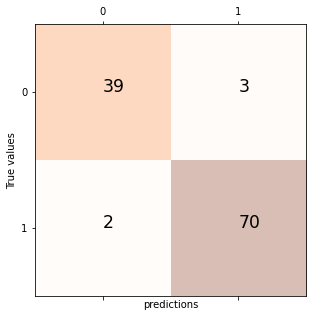

In [13]:
fig,ax = plt.subplots(figsize=(5,5))
ax.matshow(cm, cmap=plt.cm.Oranges,alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j,y=i,s=cm[i,j],size='xx-large')
plt.xlabel("predictions")
plt.ylabel("True values")
plt.show()

In [14]:
accuracy_score(y_test,y_pred)

0.956140350877193

In [15]:
precision_score(y_test,y_pred)

0.958904109589041

In [16]:
recall_score(y_test,y_pred)

0.9722222222222222

In [17]:
f1_score(y_test,y_pred)

0.9655172413793104